In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
1980-12-12  0.128348  0.128906  0.128348  0.128348   0.099319  469033600
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.094137  175884800
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.087228  105728000
1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089387   86441600
1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091978   73449600


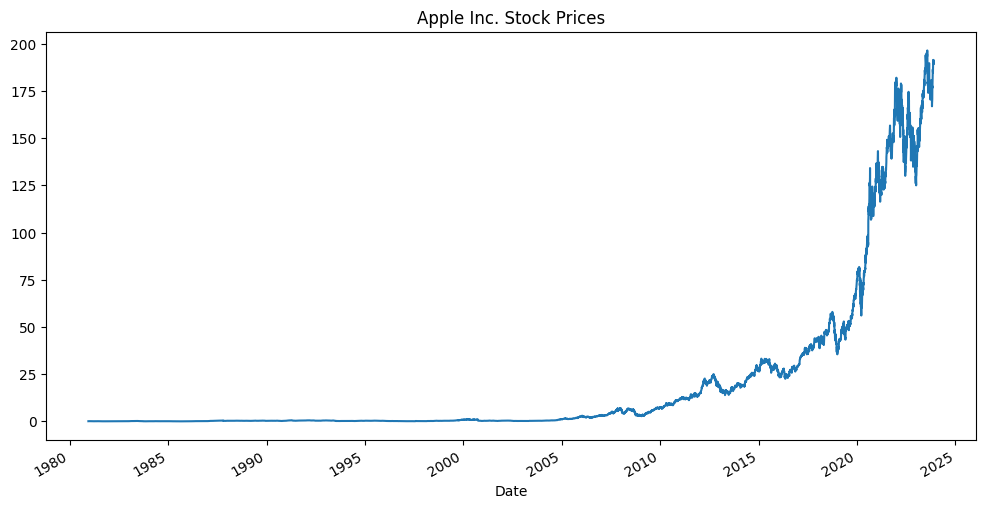

In [4]:
# Load historical stock price data for Apple Inc. from Yahoo Finance
url = 'https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=0&period2=9999999999&interval=1d&events=history'
data = pd.read_csv(url, parse_dates=True, index_col='Date')

# Display the first few rows of the dataset
print(data.head())

# Plot the time series data
data['Close'].plot(figsize=(12, 6))
plt.title('Apple Inc. Stock Prices')
plt.show()

In [5]:
# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

In [6]:
# Fit an Exponential Smoothing model
model = ExponentialSmoothing(train['Close'], trend='add', seasonal='add', seasonal_periods=30)
fit_model = model.fit()

c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [7]:
# Make predictions on the test set
predictions = fit_model.forecast(len(test))

c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Mean Squared Error: 2950.157680386858


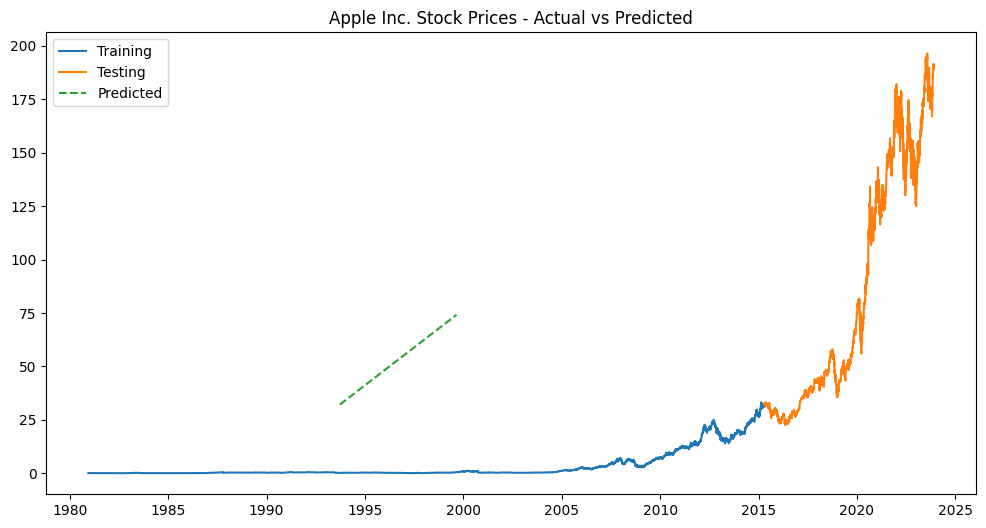

In [8]:
# Evaluate the model using Mean Squared Error
mse = mean_squared_error(test['Close'], predictions)
print(f'Mean Squared Error: {mse}')

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(train['Close'], label='Training')
plt.plot(test['Close'], label='Testing')
plt.plot(predictions, label='Predicted', linestyle='dashed')
plt.title('Apple Inc. Stock Prices - Actual vs Predicted')
plt.legend()
plt.show()